# < 23. 딥러닝 레이어의 이해(1) Linear, Convolution > 

## 학습목표
- 레이어의 개념을 이해한다
- 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해한다
- 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배운다 

---

## 23.2 데이터의 형태

### 이미지 데이터
- 채널(Channel) 이라는 것을 가진다
- 우리가 일상적으로 사용하는 것은 대부분 RGB
    - RGB는 Red 채널, Green 채널, 그리고 Blue 채널

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-allcolor.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-4.max-800x600.png)

- 위 그림 데이터는 (3, 1920, 1080) 또는 (1920, 1080, 3) 의 매트릭스로 표현이 가능
- 그리고 표현 방식에 따라 Channel, Width, Height의 이니셜로 (C, W, H), (W, H, C)와 같이 표기
- fps : 프레임 당 초

---

## 23.4 딥러닝의 근본! Linear 레이어

- Linear 레이어는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 한다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-6.max-800x600.png)

- 위 그림의 두 사각형은 모두 (x, y) 2차원의 점 4개로 표현 가능하므로, 각각 (4, 2) 행렬 형태의 데이터로 표현할 수 있다. 우리는 두 사각형을 각각 어떤 하나의 정수로 표현하고자 하는데 이 정수는 우리가 구분하고자 하는 사각형의 종류(class)를 의미
- < 식1>
    - 1단계 : (4, 2) x (2, 1) 행렬 = (4, )
    - 2단계 : (4, ) x (4, 1) 행렬 = (1, )
- 위 단계를 사용하면 각각의 사각형을, 정보가 집약된 하나의 정수로 표현할 수 있다. 2차원을 1차원으로 변환하는 데에 (2, 1) 혹은 (2 x 1) 행렬이 하나 선언되고, 4차원을 1차원으로 변환하는 데에 (4, 1) 혹은 (4 x 1) 행렬이 하나 선언됨에 유의. 
- 여기서 각각의 행렬들이 Weight이다. Linear 레이어는 (입력의 차원, 출력의 차원)에 해당하는 Weight를 가지는 특성을 가지고 있다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-7.max-800x600.png)

- 두 사각형에 대해 1단계를 거치고 난 결과가 동일하다. 이렇게 되면 <식1>의 2단계 입력이 동일해지니 두 번째 (4x1) Weight를 거치는 것이 의미가 없어진다.
- 여기서 모든 weigth의 요소를 Parameter라고 한다

- <식2>
    - 1단계 : (4, 2) x (2 x 3) 행렬 = (4, 3)
    - 2단계 : (4, 3) x (3 x 1) 행렬 = (4, )
    - 3단계 : (4, ) x (4 x 1) 행렬 = (1, )
    - 파라미터 총 13개

In [3]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()


print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


- "그렇다면 Parameter가 많은 것이 최고인가?" 그렇지 않다. 지나치게 많은 Parameter는 과적합을 야기한다. 과적합은 쉽게 말해서 학생이 문제만 보고 정답을 외우는 것과 같다
- 추가로 이야기할 것은 바로 편향(Bias)
    - 편향이 없다면 파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없다. 
    - y=Wx+b 속의 b 가 바로 그 편향 값
    - 예제에서 Dense 클래스 속 use_bias 파라미터를 True 로 바꿔주면 실험해 볼 수 있다

---

## 23.5 정보를 집약시키자! Convolution 레이어

- Convolution 연산이라는 것은 딥러닝 외적으로도 많이 사용되는 개념이다

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24_conv.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24_conv2.max-800x600.png)

- 위의 그림은 3x3 사이즈의 필터(커널)를 선언후, 이미지를 필털 훑으며 각 픽셀을 곱하여 더하는 convolution 연산을 표현하고 있다. 이미지와 필터가 겹치는 부분의 값을 서로 곱한 후 그 값을 모두 더하면 새로운 이미지의 한 픽셀값이 되는 것이다
- stride : 필터가 이동하는 칸의 수.
    - 한칸씩 이동하며 훑을 수도 있지만, 두 칸, 세 칸씩 이동하며 훑을 수도 있다
- padding : 입력의 테두리에 0을 추가해 입력의 형태를 유지할 수 있게 하는 테크닉
    - https://brunch.co.kr/@coolmindory/37

### Convolution 레이어
- 필터가 어떤 목적을 가질 수 있다면, 손을 찾는 데에 적합한 필터도 존재할 수 있지 않을까? 목적에 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 상상할 수 있다! 그런 멋진 필터를 훈련을 통해 찾아주는 것이 바로 Convolution 레이어가 하는 일이다. 심지어는 단 하나의 필터가 아닌 수십 개의 필터를 중첩해서!!
- Convolution 레이어는 입력의 정보를 집약시키는 효과가 뛰어나기 때문에 여러 겹의 레이어를 중첩하는 것이 일반적이고, 중첩할수록 최종 Linear 레이어는 작아지게 된다. 입력에서 중요한 부분을 뽑아내는 데에 최적화!

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-11.max-800x600.png)

<식 4> <br>
1단계: (1920, 1080, 3) x [3 x 16 x 5 x 5 Weight & Stride 5] = (384, 216, 16) <br>
2단계: (384, 216, 16) → (384 x 216 x 16, ) <br>
3단계: (1327104, ) x [1327104 x 1 Weight] = (1, ) <br>

- <식 4>는 16개의 5 x 5 필터를 가진 Convolution 레이어를 정의하여 이미지를 Stride 5로 훑었고, 그렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약하다. 필터들은 입력의 3채널에 각각 적용되므로 Convolution 레이어의 파라미터는 3 x 16 x 5 x 5 = 1200개

In [4]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


---

## 23.6 핵심만 추려서 더 넓게! Pooling 레이어

### Convolution 레이어의 정보 집약 효과, 이걸로 충분한가?

- Convolution 레이어는 필터 구조 안에 Locality 정보가 온전히 보존된다. 인접한 픽셀들 사이에서의 패턴만 추출할 수 있다는 것 자체만으로도 불필요한 파라미터 및 연산량을 제거하고 훨씬 정확하고 효율적으로 정보를 집약시킬 수 있게 된다
- 이전 스텝 문제를 떠올려보면, Convolution 레이어만으로 손이라는 객체를 판별해 내는데 충분했는가? 여기엔 두가지 문제가 있다
    - 5 X 5라는 필터 사이즈는 object detection을 위한 유의미한 정보를 담아내기에는 너무 작은 사이즈이다.
    - 이미 Stride를 5로 주고 있었기 때문에 파라미터를 줄어드는 효과는 발생했지만 찾고자 하는 object가 필터 경계선에 걸려서 인식하지 못할 우려가 있다.
- 그렇다고 필터 사이즈를 훨씬 크게 하는게 답은 아니다. 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면 Convolution 레이어는 완벽하게 Linear 레이어와 같아지게 된다. 필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, Accuracy도 떨어지게 될 가능성이 높다.

### Receptive Field 개념

- 우리가 크게 해야 할 것은 필터 사이즈가 아니라 수용영역(Receptive Field)이라는 것이다. 
- Neural Network의 출력부가 충분한 정보를 얻기 위해 커버하는 입력 데이터의 Receptive Field가 충분히 커서 그 안에 detect해야 할 object의 특성이 충분히 포함되어 있어야 정확한 detection이 가능하게 된다. 

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-24_receptive.png)

- 위 그림은 7 X 7의 이미지에 3 X 3의 필터로 Convolution한 결과를 도식화한 것
- Convolution 레이어를 한 번 통과한 후 Output의 빨간색 포인트는 원본 이미지의 좌상단 3 X 3만큼의 입력만을 수용하게 된다. 그 결과 이 포인트의 Receptive Fiedl의 크기는 Filter size와 정확히 같다

### Max Pooling 레이어의 의미
- Max Pooling 레이어를 통해 효과적으로 Receptive Field를 키우고, 정보 집약 효과를 극대화할 수 있다. 이러는 동안 늘어난 파라미터 사이즈는 0이다.
- Convolution 레이어에서 힘들게 연산한 결과의 일부를 그냥 버리는것인데 이런 낭비를 왜 하게 되는걸까? 정보 손실이 가져오는 Accuracy 저하 효과는 없는 건가

#### translational invariance 효과
- 이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있는데, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있어서 오히려 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다고 한다.

#### Non-linear 함수와 동일한 피처 추출 효과
- Relu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가진다. Min/Max Pooling도 이와 동일한 효과를 가지게 된다

#### Receptive Field 극대화 효과
- Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 한다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 한다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Max Pooling 레이어 사용이다. 다른 하나로는 Dilated Convolution이 있습는데 이는 https://m.blog.naver.com/sogangori/220952339643

---

## 23.7 집약된 정보의 복원! Deconvolution 레이어
-  Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해 내는 Auto Encoder에 대해 알아보자
- 순서는 
    - 패키지 임포트 및 MNIST 데이터셋 로딩
    - AutoEncoder 모델 구성
    - AutoEncoder 모델 훈련
    - AutoEncoder Reconstruction Test

In [5]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11501568/11490434 [==============================] - 0s 0us/step


- y_train, y_test 를 사용하지 않는 이유는 AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이 되기 때문

In [6]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 8s 9ms/step - loss: 0.6959 - val_loss: 0.6953
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6948 - val_loss: 0.6942
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6935 - val_loss: 0.6929
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6922 - val_loss: 0.6915
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6907 - val_loss: 0.6899
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6890 - val_loss: 0.6881
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6870 - val_loss: 0.6859
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6845 - val_loss: 0.6832
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6815 - val_loss: 0.6797
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6774 - val_loss: 0.6749

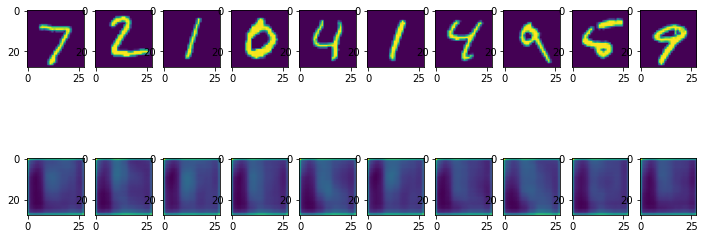

In [8]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

### Decoder Layers for Reconstruction
- 위에서 Decoder에서 이미지 복원을 위해 사용했던 Convolution 레이어는 실은 Encoder에서 사용했던 것과 동일한 레이어
- 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있는 것
-  Convolution 레이어를 거쳐 정보가 집약되는 것이 아니라 오히려 정보량이 많아지고 있다
- 정방향의 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생해 내는 효과를 구현한 것
- 방금은 Convolution 레이어를 활용해서 Transposed Convolution를 흉내 낸 것

### Upsampling 레이어
- Max pooling 레이어를 통해 Downsampling을 시도해 왔다면, 이제 Upsampling 레이어를 통해 그 반대 작업을 수행
- 이미 버린 정보를 복원하는 것이 얼마나 쉬울까요?
    - Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
    - Bed of Nails : 복원해야 할 값을 0으로 처리한다.
    - Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.
    - https://analysisbugs.tistory.com/104
- 우리는 위에서 파라미터를 별도로 주지 않았으므로 디폴트인 Nearest Neighbor로 복원

### Transposed Convolution
- Up-sampling을 최적으로 하려면 Transposed convolution를 사용하면 된다
    - DCGAN의 generator는 무작위로 샘플링된 값을 사용해 full-size 이미지를 생성
    - Semantic segmentation은 convolutional 레이어를 사용해 encoder에서 feature를 추출한 다음, original 이미지의 모든 픽셀을 분류하기 위해 decoder에서 original 이미지 크기를 복원
- https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/

In [9]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 